In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import json

In [3]:
with open('match_details.txt', 'r') as fi:
    buff = fi.read()
data = json.loads(buff)
df = pd.DataFrame(data)

In [18]:
df = df[df['match_id'].notnull()]

In [26]:
teamName = 'Invictus Gaming'
ig_frame = df[(df[['radiant_name', 'dire_name']]==teamName).any(1)]
print("total matches:%d" % len(ig_frame))
ig_win_frame = df[((df['radiant_name']==teamName)&(df['radiant_win'])) | ((df['dire_name']==teamName)&(~df['radiant_win']))]
print('win matches:%d' % len(ig_win_frame))

total matches:26
win matches:24


max:74.45 min:23.30 mean:45.65


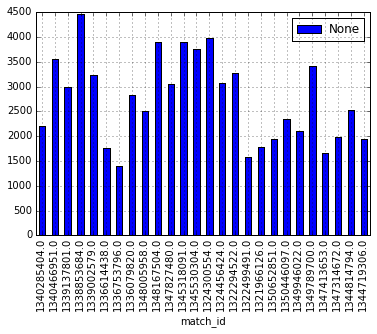

In [39]:
ig_frame.plot(kind='bar', x='match_id', y='duration')
print('max:%.2f min:%.2f mean:%.2f' % (ig_frame['duration'].max()/60.0, ig_frame['duration'].min()/60.0, ig_frame['duration'].mean()/60.0))

In [40]:
#计算kad和参战率
def getTeamKills(x, y):
    return x+y['kills']
def setPlayKadAndRate(frame):
    if isinstance(frame, pd.DataFrame):
        for index, row in frame.iterrows():
            players = row['players']
            radiant_kills = reduce(getTeamKills, players[:5], 0)
            dire_kills = reduce(getTeamKills, players[5:], 0)
            for player in players:
                ka = (player['kills']+player['assists'])*1.0
                #计算kad
                if player['deaths']==0:
                    player['kad'] = ka
                else:
                    player['kad'] = ka/player['deaths']
                #计算参战率    
                if player['player_slot']<5:
                    if radiant_kills==0:
                        player['rate'] = 0
                    else:
                        player['rate'] = ka/radiant_kills
                else:
                    if dire_kills==0:
                        player['rate'] = 0
                    else:
                        player['rate'] = ka/dire_kills

In [43]:
setPlayKadAndRate(ig_frame)